In [1]:
#setup
#30
def read_file(file_name):
    with open(file_name,mode = 'rt',encoding='utf-8') as f:
        return f.read() 

def save_file(file_name,text):
    with open(file_name,'w') as f:
        return f.write(text)
    
def read_mecab(file_name):
    box = []
    sentences = read_file(file_name)
    sentences = sentences.split("EOS\n")
    for i,sentence in enumerate(sentences):
        sm = []
        if(len(sentence)<2):
            continue
        words = sentence.splitlines() 
        for word in words:
            l = word.split('\t')
            tex = l[1].split(',')
            linedic = {
                "surface" : l[0],
                "base" : tex[6],
                "pos" : tex[0],
                "pos1" : tex[1],
            }
            sm.append(linedic)
        box.append(sm)
    return box

In [2]:
#30
block = read_mecab("data/neko.txt.mecab")


In [3]:
#31
b31 = []
for i in block:
    for j in i:
        if j['pos'] == '動詞':
            b31.append(j['surface'])

In [4]:
#32
b32 = []
for i in block:
    for j in i:
        if j['pos'] == '動詞':
            b32.append(j['base'])

In [5]:
#33
b33 = []
for i in block:
    for j in range(len(i)-2):
        if i[j]['pos'] == '名詞':
            if (i[j+1]['surface'] == 'の') and (i[j+2]['pos']=='名詞'):
                b33.append(i[j]['surface']+'の'+i[j+2]['surface'])
#print(b33)

In [6]:
#34
b34 = []
def ext34(block):
    res = []
    tmp = []
    for j in block:
        if j['pos'] == '名詞':
            tmp.append(j['surface'])
        elif len(tmp) >= 2:
            res.append(''.join(tmp))
            tmp = []
        else:
            tmp = []
    return res

for bun in block:
    res = ext34(bun)
    if len(res)>0:
        for i in res:
            b34.append(i)

#print(b34)

In [33]:
#35
from collections import defaultdict
b35 = defaultdict(int)
def ext35(i):
    res = i['base']+'_'+i['pos']+'_'+i['pos1']
    return res

for bun in block:
    for i in bun:
        b35[ext35(i)] += 1
        
b35 = {k: v for k, v in sorted(b35.items(),key=lambda item: item[1],reverse=True)}
print(b35)

{'。_記号_句点': 7486, 'の_助詞_連体化': 7032, 'て_助詞_接続助詞': 6812, '、_記号_読点': 6772, 'は_助詞_係助詞': 6420, 'を_助詞_格助詞': 6071, 'だ_助動詞_*': 5975, 'に_助詞_格助詞': 5470, 'た_助動詞_*': 4267, 'が_助詞_格助詞': 4196, 'と_助詞_格助詞': 3991, 'する_動詞_自立': 3657, '「_記号_括弧開': 3231, '」_記号_括弧閉': 3225, 'も_助詞_係助詞': 2479, 'ない_助動詞_*': 2048, '*_名詞_一般': 1735, 'で_助詞_格助詞': 1646, 'の_名詞_非自立': 1611, 'か_助詞_副助詞／並立助詞／終助詞': 1529, 'いる_動詞_非自立': 1503, '云う_動詞_自立': 1408, 'ある_助動詞_*': 1206, 'から_助詞_接続助詞': 1186, 'です_助動詞_*': 1164, '事_名詞_非自立': 1150, 'ます_助動詞_*': 1145, 'が_助詞_接続助詞': 1138, 'へ_助詞_格助詞': 1031, 'と_助詞_接続助詞': 1029, 'なる_動詞_自立': 1015, 'ない_形容詞_自立': 1004, 'う_助動詞_*': 980, 'もの_名詞_非自立': 978, 'ある_動詞_自立': 959, '主人_名詞_一般': 932, 'ん_助動詞_*': 850, 'から_助詞_格助詞': 845, 'に_助詞_副詞化': 769, 'ぬ_助動詞_*': 719, 'ん_名詞_非自立': 704, '見る_動詞_自立': 675, 'よう_名詞_非自立': 669, 'ね_助詞_終助詞': 657, 'この_連体詞_*': 649, '君_名詞_接尾': 641, 'ば_助詞_接続助詞': 584, 'その_連体詞_*': 576, '一_名詞_数': 554, '御_接頭詞_名詞接続': 552, '思う_動詞_自立': 502, 'よ_助詞_終助詞': 501, '何_名詞_代名詞': 498, '吾輩_名詞_代名詞': 481, 'の_助詞_格助詞': 463, 'れる_動詞_接尾': 450, '…_

In [8]:
#36
import matplotlib.pyplot as plt
import japanize_matplotlib

b36 = list(b35.items())[:10]
labels = [a[0] for a in b36]
values = [a[1] for a in b36]
#plt.figure(figsize=(10,10))
#plt.barh(labels,values)
#plt.show()

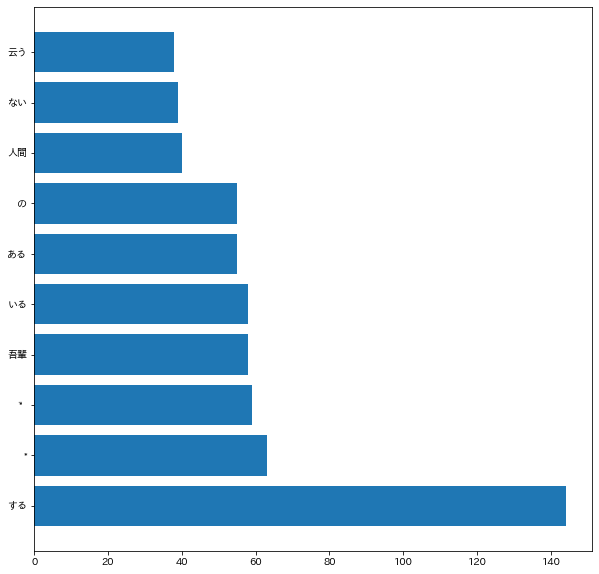

In [9]:
#37
#助詞を除く
b37 = []
b37t = []
for bun in block:
    tmp = []
    for i in bun:
        if(i['pos'] in {'名詞', '動詞', '形容詞', '副詞'}):
            tmp.append(i['base'])
    b37t.append(tmp)

b37d = defaultdict(int)
for i in b37t:
    if '猫' in i:
        for j in i:
            b37d[j] += 1

b37d = {k: v for k, v in sorted(b37d.items(),key=lambda item: item[1],reverse=True)}
b37 = list(b37d.items())[1:11]
labels37 = [a[0] for a in b37]
values37 = [a[1] for a in b37]
plt.figure(figsize=(10,10))
plt.barh(labels37,values37)
plt.show()

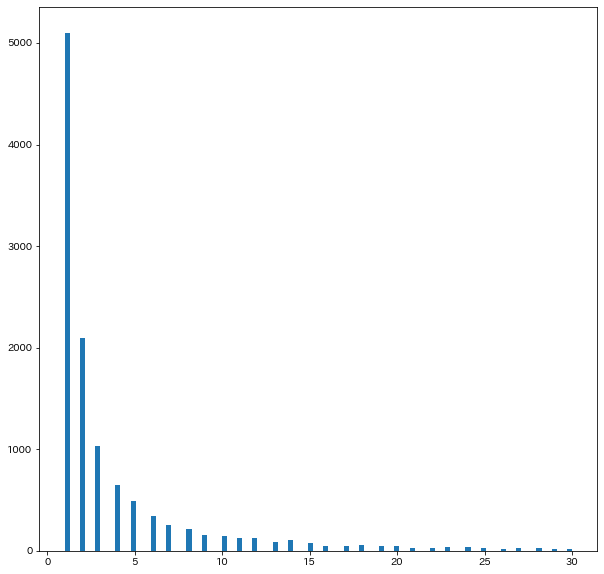

In [55]:
#38
b38 = list(b35.items())
values38 = [a[1] for a in b38]
labels38 = [a[0] for a in b38]
#print(values38)
plt.figure(figsize=(10,10))
plt.hist(values38,bins=100,range=(1,30))
#plt.xlim(xmin=1,xmax=20)
plt.show()

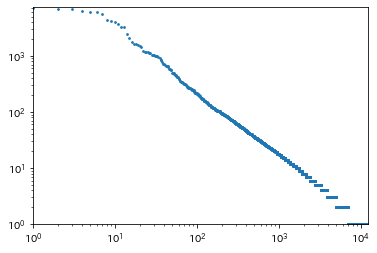

In [63]:
#39
plt.scatter(range(len(values38)),values38,s=3)
plt.xscale("log")
plt.yscale("log")
plt.xlim(1, len(labels38))
plt.ylim(1, values38[0])
#plt.figure(figsize=(1000,1000))
plt.show()